###################################
# PART 1: INITIAL DATA EXPLORATION
###################################

# Basic Data Loading and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('housing.csv')

In [3]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
print("\nDataset shape:")
print(df.shape)


Dataset shape:
(20640, 10)


In [6]:
print("\nColumn info:")
print(df.info())


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
print("\n Data Types")
print(df.dtypes)


 Data Types
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [8]:
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
2

In [23]:
df["longitude"].describe()

count    20640.000000
mean      -119.569704
std          2.003532
min       -124.350000
25%       -121.800000
50%       -118.490000
75%       -118.010000
max       -114.310000
Name: longitude, dtype: float64

In [24]:
df["total_bedrooms"].value_counts()

total_bedrooms
280.0     57
331.0     52
345.0     50
393.0     50
343.0     49
          ..
1821.0     1
4335.0     1
1892.0     1
2145.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

###################################
# PART 2: HANDLING MISSING VALUES
###################################

In [9]:
print("Missing values in each column:")
print(df.isnull().sum())

print("\nPercentage of missing values:")
print((df.isnull().sum() / len(df)) * 100)

Missing values in each column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of missing values:
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
# Demo: Handling Missing Values in Numeric Columns
# Method 1: Mean Imputation
df['median_income'].fillna(df['median_income'].mean(), inplace=True)

# Method 2: Median Imputation
df['total_rooms'].fillna(df['total_rooms'].median(), inplace=True)

# Method 3: Forward Fill
df['population'].fillna(method='ffill', inplace=True)

# Method 4: Backward Fill
df['total_bedrooms'].fillna(method='bfill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13028\2814289543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['median_income'].fillna(df['median_income'].mean(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13028\2814289543.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [11]:
# Demo: Handling Missing Values in Categorical Columns
# Method 1: Mode Imputation
df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)

# Method 2: Fill with specific value
df['ocean_proximity'].fillna('Unknown', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13028\109232141.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ocean_proximity'].fillna(df['ocean_proximity'].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13028\109232141.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [30]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_ratio,population_per_household,price_category,log_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,Very High,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,Very High,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,Very High,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,Very High,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,Very High,12.743154


###################################
# PART 3: HANDLING OUTLIERS
###################################


In [12]:
# Instructor Demo: Detecting Outliers using IQR Method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")
    
    # Visualize outliers
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column} showing outliers')
    plt.show()


In [13]:
# Demo different outlier handling methods
# Method 1: Removing outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_clean

# Method 2: Capping outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df[column] = df[column].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
    return df


Number of outliers in median_house_value: 1071
Percentage of outliers: 5.19%


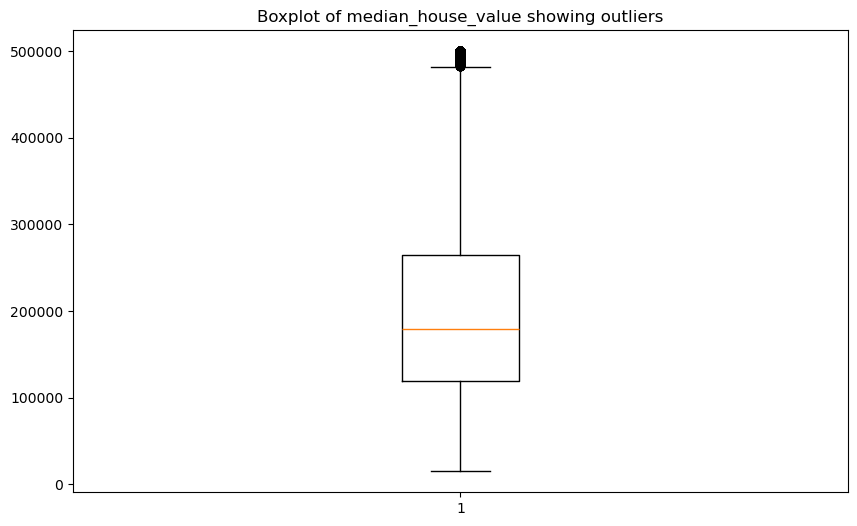

In [14]:
detect_outliers(df,"median_house_value")


###################################
# PART 4: FEATURE ENGINEERING
###################################


# Instructor Demo: Creating New Features

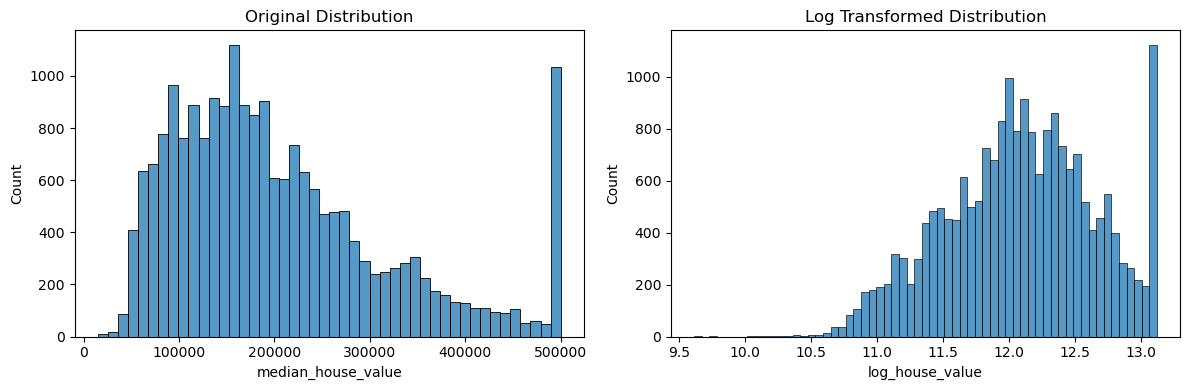

In [15]:
# Method 1: Ratio Features
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_ratio'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

# Method 2: Binning Numeric Variables
df['price_category'] = pd.qcut(df['median_house_value'], 
                             q=4, 
                             labels=['Low', 'Medium', 'High', 'Very High'])

# Method 3: Log Transformation
df['log_house_value'] = np.log1p(df['median_house_value'])

# Visualize transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'])
plt.title('Original Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['log_house_value'])
plt.title('Log Transformed Distribution')
plt.tight_layout()
plt.show()


In [16]:
df['price_category'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Very High
1        Very High
2        Very High
3        Very High
4        Very High
           ...    
20635          Low
20636          Low
20637          Low
20638          Low
20639          Low
Name: price_category, Length: 20640, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']>

###################################
# PART 5: DATA VISUALIZATION
#################################



# Univariate Analysis

In [17]:
def plot_numeric_distribution(df, column):
    plt.figure(figsize=(15, 5))

    # plt.subplot(nrows, ncols, index)
    # Histogram
    plt.subplot(1, 3, 1)                       # row =1, total column=3, column index=1
    sns.histplot(data=df, x=column)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 3, 2)                       # row =1, total column=3, column index=2
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    
    # KDE Plot
    plt.subplot(1, 3, 3)                       # row =1, total column=3, column index=3
    sns.kdeplot(data=df, x=column)
    plt.title(f'Density Plot of {column}')
    
    plt.tight_layout()
    plt.show()


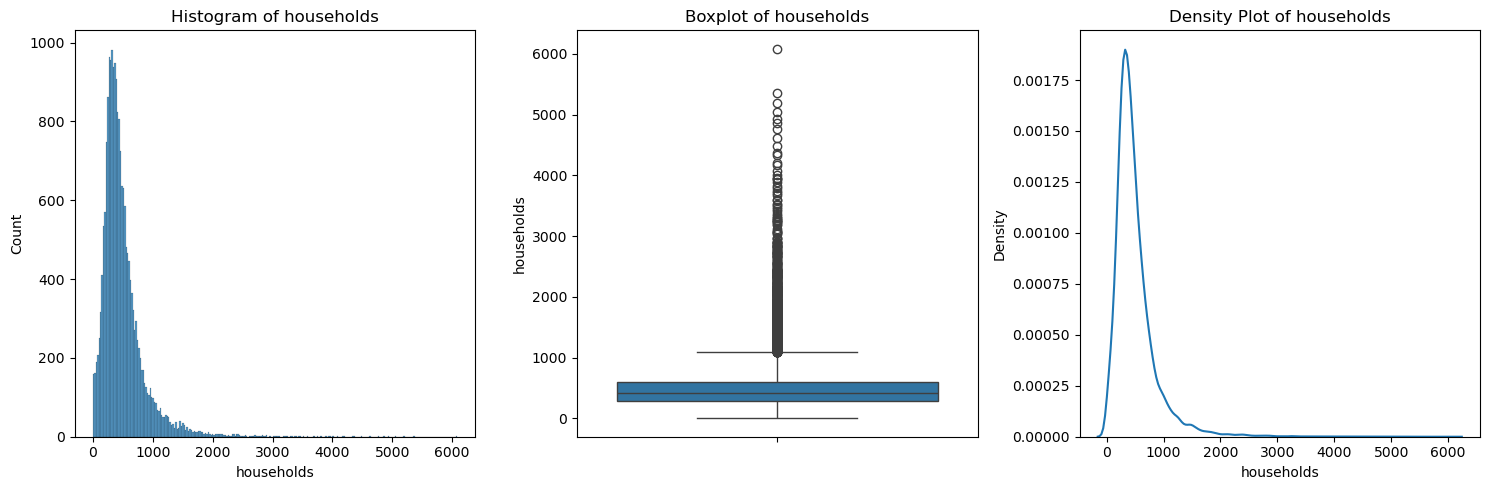

In [18]:
plot_numeric_distribution(df, "households")

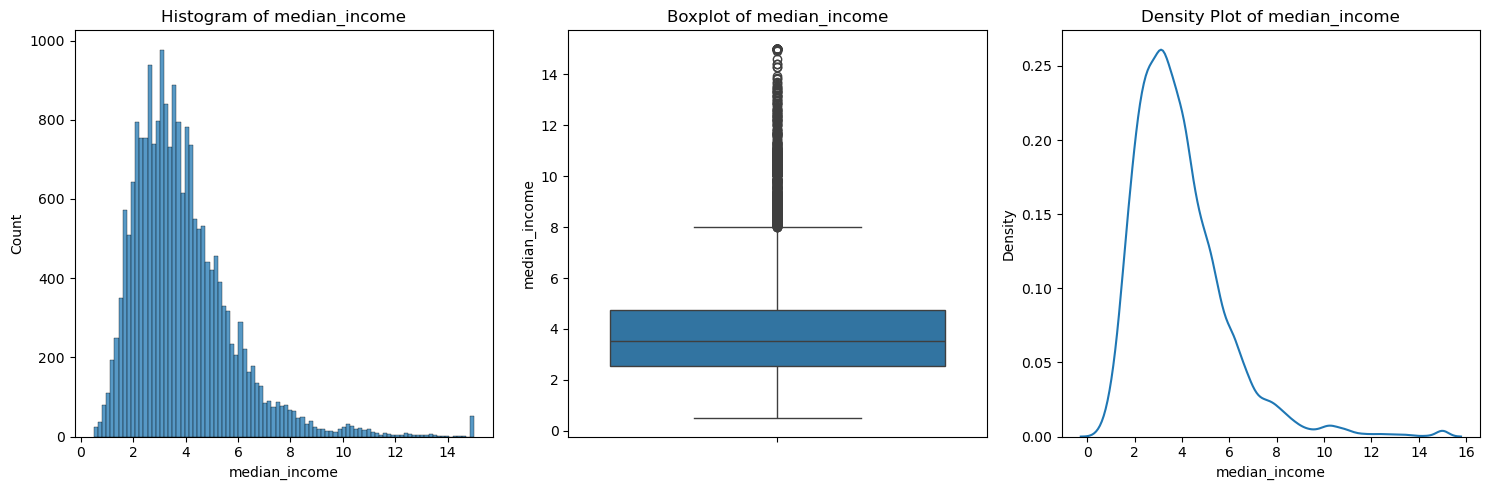

In [19]:
plot_numeric_distribution(df, "median_income")

# Bivariate Analysis

In [20]:
# Instructor Demo: Bivariate Analysis
def plot_relationship(df, x_col, y_col):
    plt.figure(figsize=(15, 5))
    
    # Scatter Plot
    plt.subplot(1, 3, 1)
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'{x_col} vs {y_col}')
    
    # Line Plot
    plt.subplot(1, 3, 2)
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.title(f'Trend of {y_col} by {x_col}')
    
    # Regression Plot
    plt.subplot(1, 3, 3)
    sns.regplot(data=df, x=x_col, y=y_col)
    plt.title(f'Regression Plot: {x_col} vs {y_col}')
    
    plt.tight_layout()
    plt.show()

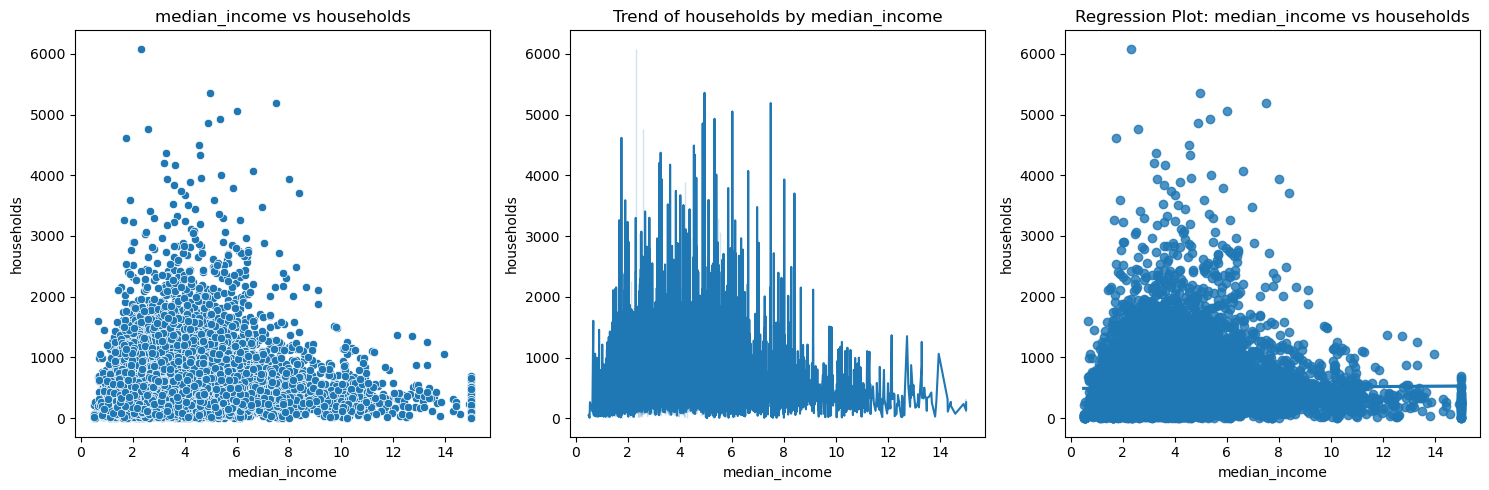

In [21]:
plot_relationship(df, "median_income","households")

In [22]:
df.corr(method='pearson')

ValueError: could not convert string to float: 'NEAR BAY'

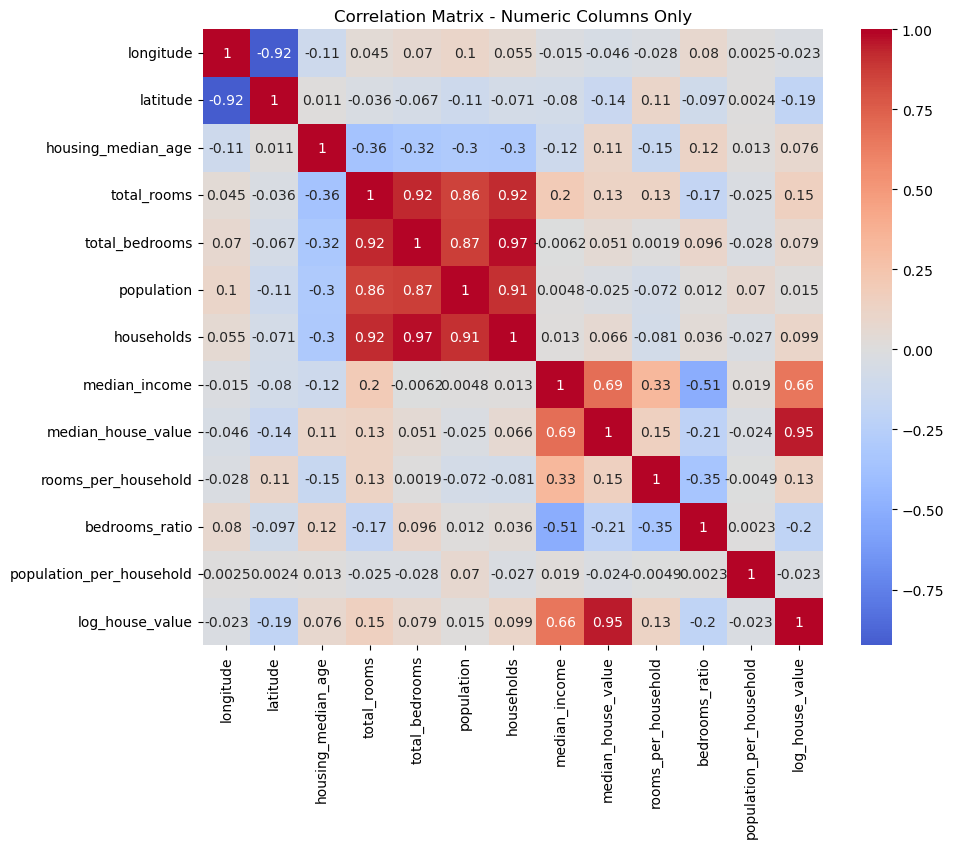

In [25]:
# Method 1: Select only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation = df[numeric_columns].corr()

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix - Numeric Columns Only')
plt.show()

Analyzing correlations...

Numeric Correlations:


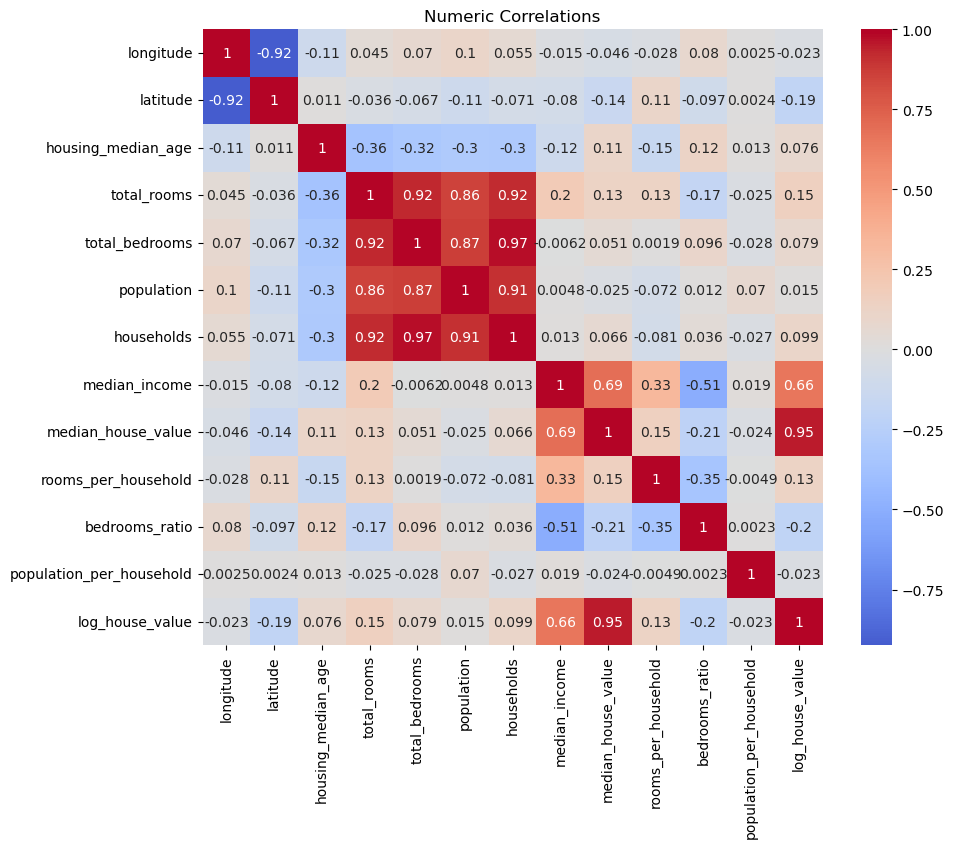



All Variables (with encoded categories):


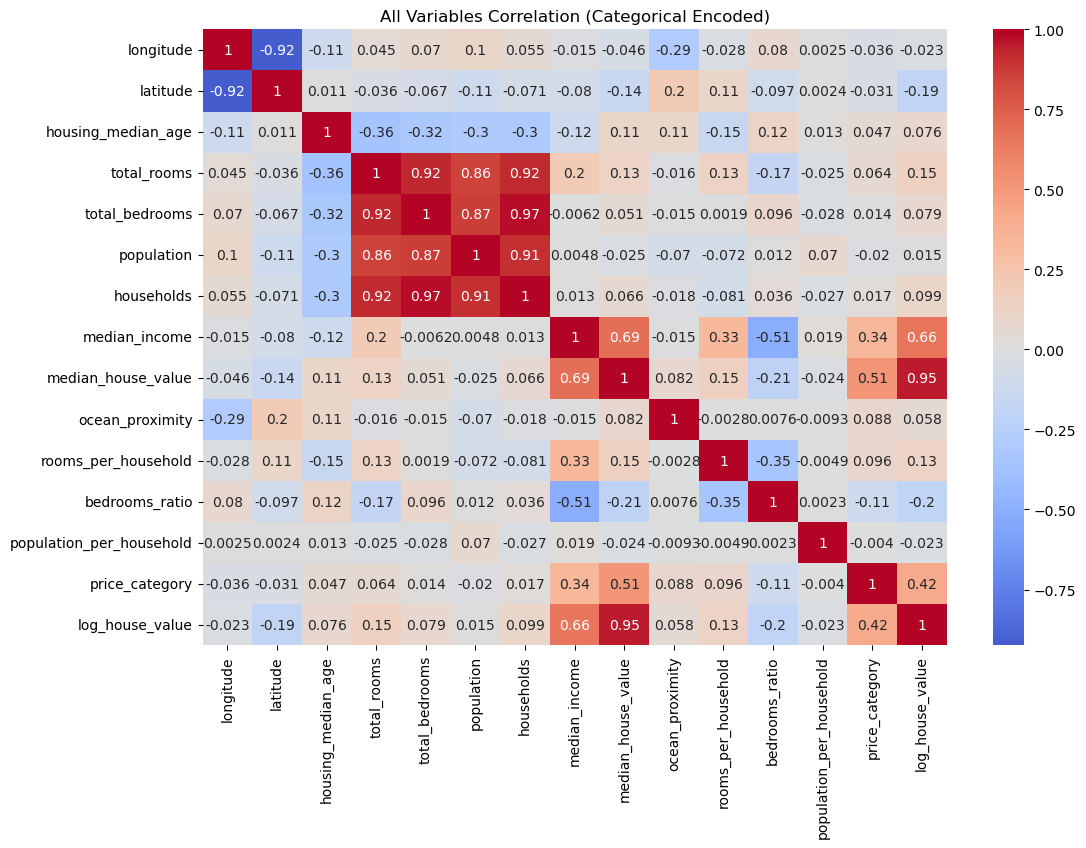

In [26]:
from sklearn.preprocessing import LabelEncoder
def comprehensive_correlation_analysis(df):
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    print("Analyzing correlations...\n")
    
    # 1. Numeric correlations
    if len(numeric_cols) > 0:
        print("Numeric Correlations:")
        numeric_corr = df[numeric_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0)
        plt.title('Numeric Correlations')
        plt.show()
        print("\n")
    
    # 2. Categorical correlations
    if len(categorical_cols) > 2:
        print("Categorical Correlations:")
        categorical_correlations(df, categorical_cols)
        print("\n")
    
    # 3. Mixed correlations (after encoding)
    print("All Variables (with encoded categories):")
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df[col].astype(str))
    
    full_corr = df_encoded.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(full_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('All Variables Correlation (Categorical Encoded)')
    plt.show()

# Usage example:
comprehensive_correlation_analysis(df)

In [27]:
# Part 4: Multivariate Analysis
def multivariate_analysis(df):
    """
    Demonstrate various multivariate visualization techniques
    """
    plt.figure(figsize=(15, 10))
    
    
    # Pair Plot
    sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms', 'population']], 
                diag_kind='kde')
    plt.suptitle('Pair Plot of Key Variables', y=1.02)
    
    plt.tight_layout()
    plt.show()

# Part 5: Advanced Visualization
def advanced_visualization(df):
    """
    Demonstrate advanced visualization techniques
    """
    plt.figure(figsize=(15, 10))
    
    # Stacked Bar Plot
    plt.subplot(2, 2, 1)
    df['price_category'] = pd.qcut(df['median_house_value'], q=4, 
                                 labels=['Low', 'Medium', 'High', 'Very High'])
    price_location = pd.crosstab(df['price_category'], 
                                pd.qcut(df['latitude'], q=3, 
                                       labels=['South', 'Central', 'North']))
    price_location.plot(kind='bar', stacked=True)
    plt.title('Price Distribution by Location')
    
    # Bubble Plot
    plt.subplot(2, 2, 2)
    plt.scatter(df['median_income'], df['median_house_value'], 
               s=df['population']/10, alpha=0.5)
    plt.xlabel('Median Income')
    plt.ylabel('House Value')
    plt.title('House Value vs Income (Size: Population)')
    
    plt.tight_layout()
    plt.show()



<Figure size 1500x1000 with 0 Axes>

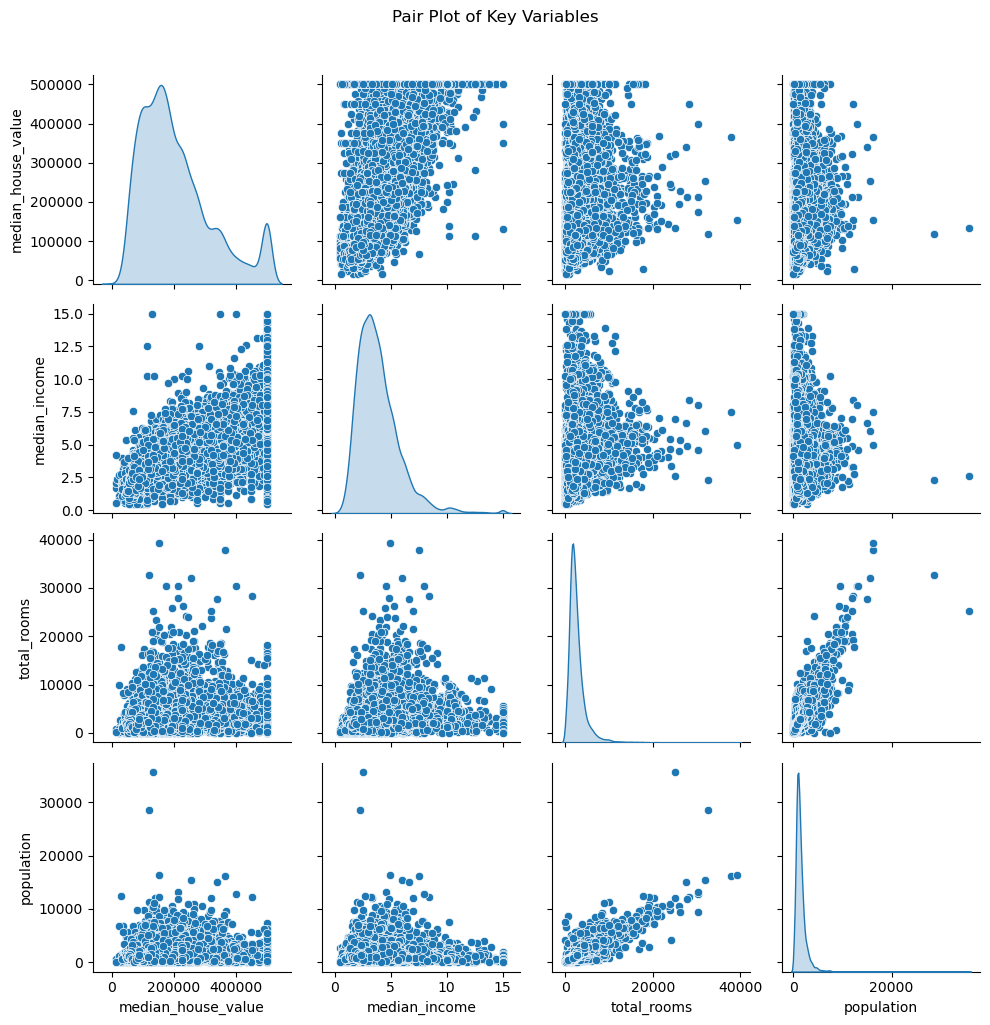

In [28]:
multivariate_analysis(df)

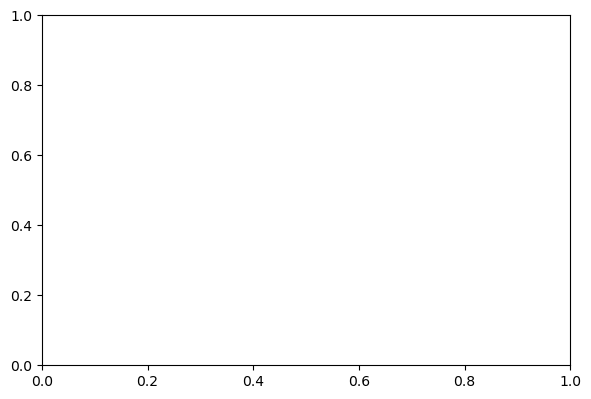

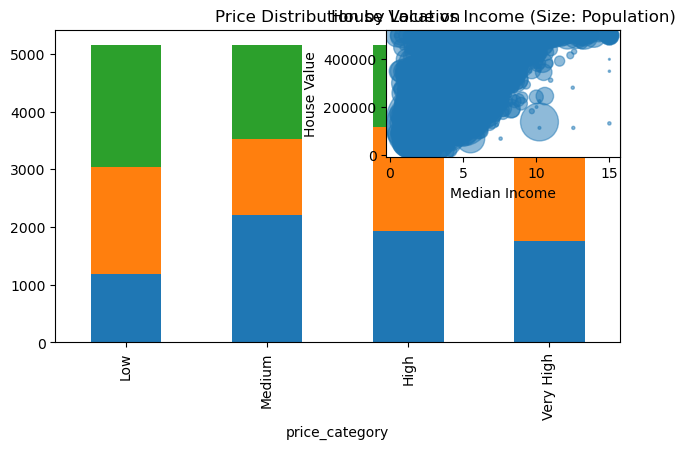

In [29]:
advanced_visualization(df)